In [27]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
fparams = {'axes.labelsize': 18,
           'axes.titlesize': 18,
           'font.size': 18,
           'legend.fontsize': 16,
           'font.family': 'serif',
           'font.serif': 'Computer Modern Roman',
           'xtick.labelsize': 16,
           'ytick.labelsize': 16,
           'text.usetex': True,
           'figure.autolayout': True}
plt.rcParams.update(fparams)

## The equation we're trying to fit:

$$
B(\Delta) = B_c\,\times\,\frac{\sqrt{1 - (\Delta/\Delta_\textrm{Al})^2}}{(1+a)\,\sqrt{1-(\Delta/\Delta_\textrm{Al})^2} -a}\,\times\,\left(\sqrt{\frac{1 - (\Delta/\Delta_\textrm{Al})}{1 + (\Delta/\Delta_\textrm{Al})}}- \frac{\Delta}{\Delta_0}\,\sqrt{\frac{1 - (\Delta_0/\Delta_\textrm{Al})}{1 + (\Delta_0/\Delta_\textrm{Al})}}\right)
$$

with $a=g_\textrm{Al}\,\mu_B\,B_c$. Assuming $g_\textrm{Al}$ is known, there are three free parameters $B_c, \Delta_0, \Delta_\textrm{Al}$.

In [28]:
ydata = np.array([0, 50, 75, 100, 150, 200, 250])
xdata = np.array([151.6, 148.1, 148.6, 140.8, 129.3, 111.1, 77.1])
xdev = np.array([1.6, 1.6, 1.7, 1.6, 1.7, 1.45, 2.2])

In [75]:
def a(Bc, gap_Al):
    return 2 * 57.8 * Bc * 1e-3 / gap_Al

def g_factor(Bc, gap_Al, gap_0):
    x0 = gap_0 / gap_Al
    return gap_Al * (1 + a(Bc, gap_Al)) * x0 * np.sqrt((1 + x0)/(1 - x0)) / (57.8 * 1e-3 * Bc)

def field_vs_gap(x, Bc, gap_Al, gap_0):
    xnew = x / gap_Al
    x0 = gap_0 / gap_Al
    # Implements a constraint for x0 < 1
    if x0 > 1:
        return 1e16
    z1 = np.sqrt(1 - xnew**2)
    z2 = np.sqrt((1 - xnew)/(1 + xnew))
    z3 = np.sqrt((1 - x0)/(1 + x0))
    return Bc * (z1 / ((1 + a(Bc, gap_Al)) * z1 - a(Bc, gap_Al))) * (z2 -  (xnew / x0) * z3) 

In [80]:
popt, pcov = curve_fit(lambda x, Bc, gap_Al: field_vs_gap(x, Bc, gap_Al, xdata[0]), xdata, ydata, p0=[300, 160])
gopt = g_factor(popt[0], popt[1], xdata[0])
print popt[0], popt[1], gopt

493.983723608 157.438271709 52.6412648573


The parameters spit out from the fit are:

$B_C \simeq 494$ mT

$\Delta_\textrm{Al}\simeq 158\,\mu$eV

These give a g-factor of ~ 52.

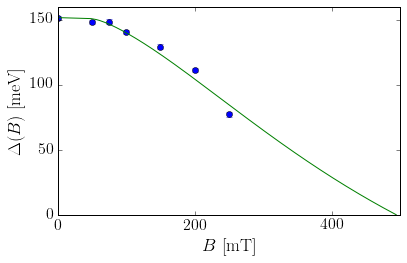

In [81]:
xs = np.linspace(0, xdata[0], 200)
ys = np.array([field_vs_gap(x, popt[0], popt[1], xdata[0]) for x in xs])
fig, ax = plt.subplots()
ax.errorbar(ydata, xdata, yerr=xdev, fmt='o')
ax.plot(ys, xs)
ax.set_xticks([0, 200, 400])
ax.set_yticks([0, 50, 100, 150])
ax.set_xlabel(r'$B$ [mT]')
ax.set_ylabel(r'$\Delta(B)$ [meV]')

I can also try to fix $\Delta_\textrm{Al}$ to, say, 180 $\mu$ eV and then re-do the fit. Then I get

$B_C \simeq 590$ mT

and a g-factor of ~ 21. Not surprisingly, the agreement with the data is much worse.

In [88]:
Bc_opt, Bc_cov = curve_fit(lambda x, Bc: field_vs_gap(x, Bc, 180, xdata[0]), xdata, ydata, p0=[300])
gopt2 = g_factor(Bc_opt, 180, xdata[0])
print Bc_opt, gopt2

[ 590.9715316] [ 20.92115382]


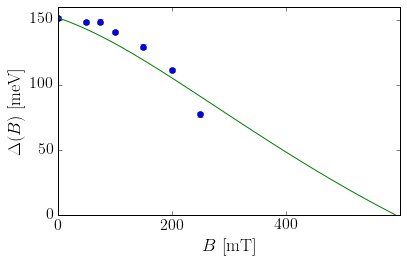

In [89]:
xs = np.linspace(0, xdata[0], 200)
ys = np.array([field_vs_gap(x, Bc_opt, 180, xdata[0]) for x in xs])
fig, ax = plt.subplots()
ax.errorbar(ydata, xdata, yerr=xdev, fmt='o')
ax.plot(ys, xs)
ax.set_xticks([0, 200, 400])
ax.set_yticks([0, 50, 100, 150])
ax.set_xlabel(r'$B$ [mT]')
ax.set_ylabel(r'$\Delta(B)$ [meV]')